Tarea III

AdvNNs

7 de noviembre de 2025

Resumen

El objetivo de esta tarea es iniciar el proyecto final. Por favor, suba sus soluciones en un archivo comprimido a Classroom antes del 18 de noviembre.

Problema 1

Describa en los siguientes puntos clave de su proyecto:

a) Un breve resumen del proyecto. No olvide declarar claramente el objetivo de su proyecto.

En un proyecto para una aplicación que le enseñe a los niños identificar diferentes deportes a través de imágenes, se busca desarrollar modelo que dada la enorme cantidad de imágenes que se requieren para, en primer lugar, la aplicación sea entretenida y, en segundo lugar, pueda identificar si un usuario suba una imagen de un deporte específico, el modelo debe ser capaz de clasificar imágenes en diferentes categorías deportivas (fútbol, baloncesto, tenis, natación, etc.) con alta precisión y eficiencia.

b) Descripción del conjunto de datos. Describa la forma, el tamaño y el preprocesamiento existente de sus datos, incluyendo el proceso de recolección de datos, etc. Añada el enlace URL de los datos.

El conjunto de datos **Sports Image Dataset** contiene imágenes clasificadas en 22 categorías deportivas, cada una representada por una carpeta con el nombre del deporte correspondiente. Cada carpeta incluye entre 400 y 900 imágenes, con un total aproximado de 14,300 imágenes. Estas imágenes fueron recolectadas utilizando un scraper de Google Images, lo que asegura una amplia variedad de ejemplos para cada categoría.

El conjunto de datos está organizado de la siguiente manera:
- **Número de categorías**: 22 (por ejemplo, fútbol, baloncesto, natación, etc.)
- **Número de imágenes por categoría**: Entre 400 y 900
- **Tamaño total**: 494.03 MB
- **Formato de las imágenes**: No especificado, pero típicamente en formatos comunes como JPG o PNG
- **Licencia**: CC BY-NC-SA 4.0

El preprocesamiento inicial incluye la clasificación de las imágenes en carpetas según su categoría. Sin embargo, no se menciona ningún otro tipo de preprocesamiento, como el cambio de tamaño, normalización o eliminación de imágenes duplicadas.

**Enlace al conjunto de datos**: [Sports Image Dataset en Kaggle](https://www.kaggle.com/datasets/rishikeshkonapure/sports-image-dataset/data)

c) Arquitectura de su modelo. Describa todos los hiperparámetros pertenecientes a su modelo, como el número de capas, neuronas, tipo de red neuronal, etc. Aunque la arquitectura final pueda variar, explique su elección inicial y calcule el número de parámetros entrenables.

Elegire como arquitectura inicial una red neuronal convolucional (CNN) debido a su eficacia comprobada en tareas de clasificación de imágenes. La arquitectura propuesta es la siguiente:

Sera una arquitectura ResNet18, lo considero adecuado debido a su capacidad para aprender características jerárquicas y su eficacia en la clasificación de imágenes.

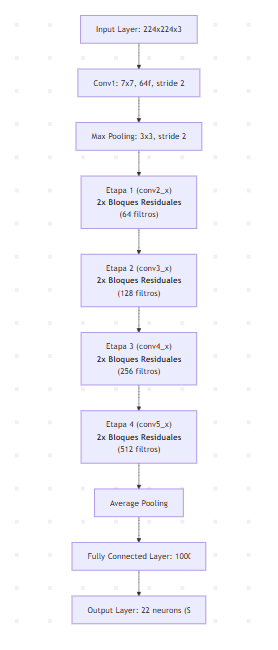

d) Describa otras consideraciones, incluyendo optimizador, función de coste, etc. Describa por qué los eligió entre otras posibilidades.

In [1]:
# Celda de código para desarrollo

Problema 2

Realice un análisis exploratorio de datos. Anote todas sus conclusiones.

In [2]:
import os
import kagglehub
import glob

path = kagglehub.dataset_download("rishikeshkonapure/sports-image-dataset")

# Cambia 'images' por 'data' para buscar en todas las carpetas de deportes
imagenes_dir = os.path.join(path, "data")

# Buscar todas las imágenes jpg en todos los subdirectorios
imagenes = glob.glob(os.path.join(imagenes_dir, "**", "*.jpg"), recursive=True)

print(f"Total de imágenes encontradas: {len(imagenes)}")

Total de imágenes encontradas: 12991


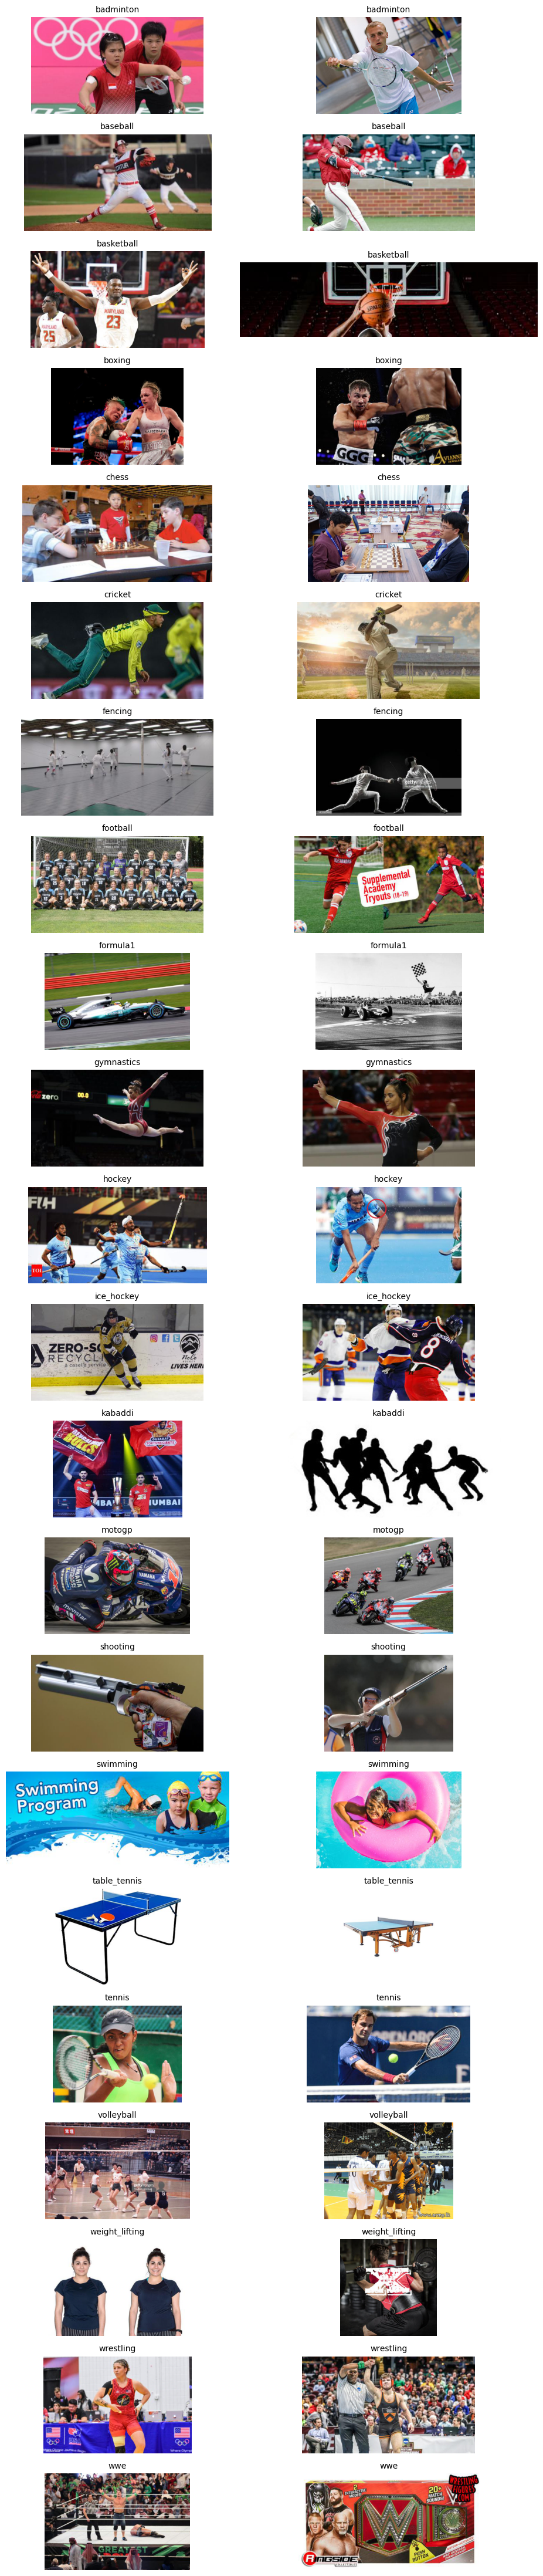

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random

imagenes_por_carpeta = {}
for img_path in imagenes:
    carpeta = os.path.basename(os.path.dirname(img_path))
    imagenes_por_carpeta.setdefault(carpeta, []).append(img_path)


imagenes_seleccionadas = []
carpetas = list(imagenes_por_carpeta.keys())
for carpeta in carpetas:
    imgs = imagenes_por_carpeta[carpeta]
    seleccionadas = random.sample(imgs, min(2, len(imgs)))
    for img in seleccionadas:
        imagenes_seleccionadas.append((img, carpeta))

# Muestra las imágenes
plt.figure(figsize=(10, 2 * len(imagenes_seleccionadas) // 2))
for i, (img_path, carpeta) in enumerate(imagenes_seleccionadas):
    img = mpimg.imread(img_path)
    plt.subplot(len(imagenes_seleccionadas) // 2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(carpeta, fontsize=10)
plt.tight_layout()
plt.show()

La anterior salida de codigo muestra un par de imagenes por categoria deportiva, permitiendo observar la variedad y características visuales de las imágenes en cada categoría.

In [4]:
def brillo_medio_color(img_path: str) -> float:
    """
    Calcula el brillo promedio de una imagen RGB.
    El brillo se define como el promedio de los valores de los canales R, G y B.

    Parámetros:
    img_path (str): Ruta de la imagen.

    Retorna:
    float: Brillo promedio.
    """
    try:
        img = mpimg.imread(img_path)
        if img.ndim == 3 and img.shape[2] >= 3:
            # Si la imagen está en formato uint8, normaliza a [0,255]
            if img.dtype == np.uint8:
                brillo = np.mean(img[..., :3])
            else:
                brillo = np.mean(img[..., :3] * 255)
            return brillo
        else:
            # Imagen en escala de grises
            return np.mean(img)
    except Exception as e:
        print(f"Error al procesar {img_path}: {e}")
        return np.nan

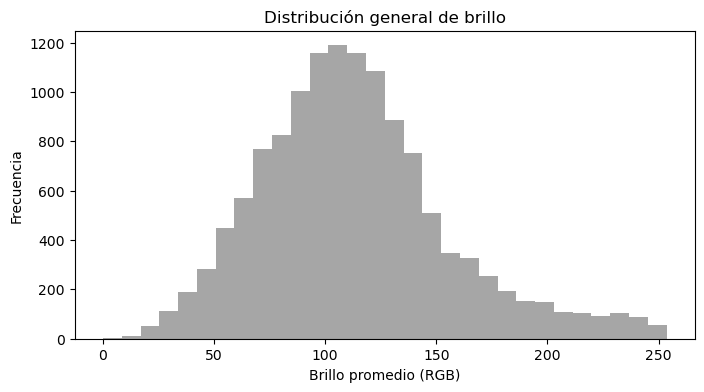

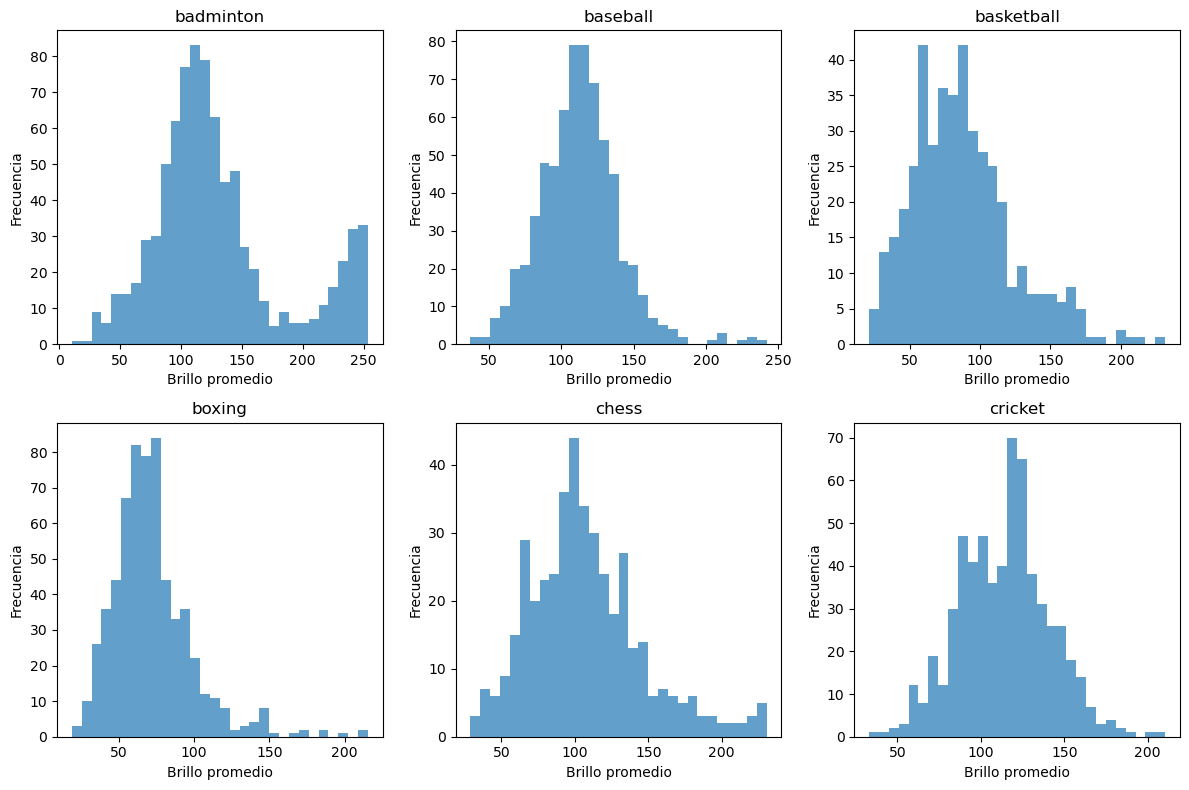

In [5]:
# Visualiza la distribución de brillo por carpeta y en general
import matplotlib.pyplot as plt

# Calcula brillos por carpeta
brillos_por_carpeta = {}
for carpeta, rutas in imagenes_por_carpeta.items():
    brillos = [brillo_medio_color(p) for p in rutas if os.path.exists(p)]
    brillos = [b for b in brillos if not np.isnan(b)]
    if brillos:
        brillos_por_carpeta[carpeta] = brillos

# Histograma general
todos_los_brillos = [b for brillos in brillos_por_carpeta.values() for b in brillos]
plt.figure(figsize=(8,4))
plt.hist(todos_los_brillos, bins=30, color='gray', alpha=0.7)
plt.title('Distribución general de brillo')
plt.xlabel('Brillo promedio (RGB)')
plt.ylabel('Frecuencia')
plt.show()

# Histogramas por carpeta (máx 6 carpetas para visualización)
plt.figure(figsize=(12,8))
for i, (carpeta, brillos) in enumerate(list(brillos_por_carpeta.items())[:6]):
    plt.subplot(2,3,i+1)
    plt.hist(brillos, bins=30, alpha=0.7)
    plt.title(f'{carpeta}')
    plt.xlabel('Brillo promedio')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Selecciona hasta 10 imágenes por cada carpeta (todas las carpetas incluidas)
pixeles_por_carpeta = {}
for carpeta, rutas in imagenes_por_carpeta.items():
    seleccionadas = random.sample(rutas, min(10, len(rutas)))
    pixeles = []
    for img_path in seleccionadas:
        if os.path.exists(img_path):
            try:
                img = mpimg.imread(img_path)
                if img.ndim == 3 and img.shape[2] >= 3:
                    arr = img[..., :3].reshape(-1)
                    if img.dtype != np.uint8:
                        arr = (arr * 255)
                    arr = arr.astype(np.uint8)
                else:
                    arr = img.reshape(-1)
                    arr = arr.astype(np.uint8)
                pixeles.extend(arr.tolist())
            except Exception as e:
                pass
    if pixeles:
        pixeles_por_carpeta[carpeta] = pixeles

# Histograma global
todos_pixeles = [p for pixs in pixeles_por_carpeta.values() for p in pixs]
plt.figure(figsize=(8,4))
plt.hist(todos_pixeles, bins=50, color='purple', alpha=0.7)
plt.title('Distribución global de valores de píxeles (muestra de 10 imágenes por carpeta)')
plt.xlabel('Valor de píxel (0-255)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización: 4 histogramas por figura para mejor claridad
carpetas_a_mostrar = list(pixeles_por_carpeta.items())
num_por_figura = 4
num_figuras = (len(carpetas_a_mostrar) + num_por_figura - 1) // num_por_figura

for fig_idx in range(num_figuras):
    plt.figure(figsize=(14, 8))
    for i in range(num_por_figura):
        idx = fig_idx * num_por_figura + i
        if idx >= len(carpetas_a_mostrar):
            break
        carpeta, pixs = carpetas_a_mostrar[idx]
        plt.subplot(2, 2, i + 1)
        plt.hist(pixs, bins=50, alpha=0.7)
        plt.title(f'{carpeta}')
        plt.xlabel('Valor de píxel')
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

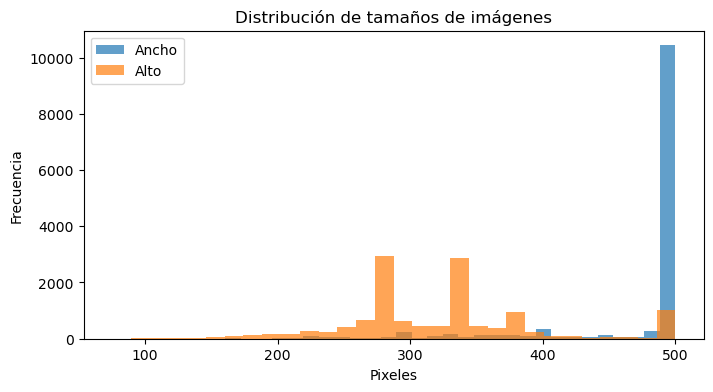

Tamaño más común: (500, 281)
Tamaños únicos: 1648


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from collections import Counter

anchos = []
altos = []

for img_path in imagenes:
    if os.path.exists(img_path):
        try:
            img = mpimg.imread(img_path)
            altos.append(img.shape[0])
            anchos.append(img.shape[1])
        except Exception as e:
            pass

plt.figure(figsize=(8,4))
plt.hist(anchos, bins=30, alpha=0.7, label='Ancho')
plt.hist(altos, bins=30, alpha=0.7, label='Alto')
plt.title('Distribución de tamaños de imágenes')
plt.xlabel('Pixeles')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Corrige el cálculo del tamaño más común
tamanos = list(zip(anchos, altos))
contador = Counter(tamanos)
mas_comun = contador.most_common(1)[0][0] if contador else (None, None)
print(f'Tamaño más común: {mas_comun}')
print(f'Tamaños únicos: {len(contador)}')

La mayoría de imagenes son de (500 x 281) pixeles, hacer un resize de todas las imagenes a (224 x 224) pixeles sera adecuado para el modelo.

In [ ]:
'''
from PIL import Image
import glob
import os

# Carpeta de entrada y salida
input_dir = imagenes_dir
output_dir = "data_224"

os.makedirs(output_dir, exist_ok=True)

# Busca todas las imágenes jpg y png
imagenes = glob.glob(os.path.join(input_dir, "**", "*.jpg"), recursive=True) + \
           glob.glob(os.path.join(input_dir, "**", "*.png"), recursive=True)

for img_path in imagenes:
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224), Image.LANCZOS)
        # Crea la misma estructura de carpetas en la salida
        rel_path = os.path.relpath(img_path, input_dir)
        out_path = os.path.join(output_dir, rel_path)
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        img_resized.save(out_path)
'''

Problema 3

Realice una implementación inicial "ingenua" de su proyecto usando PyTorch. Calcule al menos lo siguiente:

a) Gráfica de error a lo largo de las iteraciones.

b) Precisiones finales de entrenamiento/prueba.

c) Tiempo de su simulación (entrenamiento).

d) Muestre un dato donde su modelo entrenado exhiba un desempeño excelente.

e) Muestre un dato donde su modelo entrenado exhiba un desempeño pobre.

f) Identifique el mayor problema/desafío con su modelo actual.

g) Proponga un plan para abordar lo anterior.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from collections import Counter

# Configuración de dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Hiperparámetros
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
TRAIN_SPLIT = 0.8

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Carga del dataset desde data_224 (carpeta local en WEEK_3)
data_dir = r'data_224'
print(f'Cargando dataset desde: {data_dir}')

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
print(f'Total de imágenes: {len(dataset)}')
print(f'Clases: {dataset.classes}')
print(f'Número de clases: {len(dataset.classes)}')

# División estratificada en entrenamiento y prueba (balance perfecto por clase)
targets = [label for _, label in dataset.samples]
indices = list(range(len(dataset)))

train_indices, test_indices = train_test_split(
    indices, 
    test_size=1-TRAIN_SPLIT, 
    stratify=targets, 
    random_state=42
)

# Crear subsets balanceados
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(f'\nTamaño del conjunto de entrenamiento: {len(train_indices)}')
print(f'Tamaño del conjunto de prueba: {len(test_indices)}')

Usando dispositivo: cuda
Cargando dataset desde: data_224
Total de imágenes: 13583
Clases: ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']
Número de clases: 22

Tamaño del conjunto de entrenamiento: 10866
Tamaño del conjunto de prueba: 2717


In [25]:
# --- Data Augmentation: aplicar solo al conjunto de entrenamiento ---
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Para validación / test: determinista
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Reconstruir datasets con las nuevas transformaciones (mismas rutas/orden de clases que antes)
train_folder = datasets.ImageFolder(root=data_dir, transform=train_transform)
test_folder = datasets.ImageFolder(root=data_dir, transform=test_transform)

# Usar los mismos índices estratificados que calculamos anteriormente
train_dataset = Subset(train_folder, train_indices)
test_dataset = Subset(test_folder, test_indices)

# Actualizar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print('\n>> Data augmentation aplicado: train_transform definido con RandomResizedCrop, RandomHorizontalFlip y ColorJitter')
print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")



>> Data augmentation aplicado: train_transform definido con RandomResizedCrop, RandomHorizontalFlip y ColorJitter
Train samples: 10866, Test samples: 2717


In [ ]:
# === Estadísticas desde DataLoaders (incluye augmentations en train) ===
print('\n=== Estadísticas usando DataLoaders (muestras con transforms aplicadas) ===')

def compute_loader_stats(loader, n_batches=50):
    """Calcula media y std por canal a partir de batches del loader.
    Se des-normaliza cada batch antes de calcular estadísticas para obtener valores en [0,1].
    """
    means_r, means_g, means_b = [], [], []
    stds_r, stds_g, stds_b = [], [], []
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    batches = 0

    for images, _ in loader:
        imgs = images.cpu().numpy()  # (B, C, H, W)
        imgs = np.transpose(imgs, (0, 2, 3, 1))  # (B, H, W, C)
        # Des-normalizar: x = x * std + mean
        imgs = imgs * std + mean
        imgs = np.clip(imgs, 0.0, 1.0)

        # calular por imagen
        for im in imgs:
            means_r.append(im[:, :, 0].mean())
            means_g.append(im[:, :, 1].mean())
            means_b.append(im[:, :, 2].mean())
            stds_r.append(im[:, :, 0].std())
            stds_g.append(im[:, :, 1].std())
            stds_b.append(im[:, :, 2].std())

        batches += 1
        if batches >= n_batches:
            break

    return {
        'mean_r': np.mean(means_r), 'mean_g': np.mean(means_g), 'mean_b': np.mean(means_b),
        'std_r': np.mean(stds_r), 'std_g': np.mean(stds_g), 'std_b': np.mean(stds_b)
    }

# Calcular estadísticas a partir de los loaders (train con augmentations, test sin augmentations)
train_loader_stats = compute_loader_stats(train_loader, n_batches=50)
test_loader_stats = compute_loader_stats(test_loader, n_batches=50)

# Mostrar tabla comparativa
print(f"{'Estadística':<20} {'Train':<12} {'Test':<12} {'Drift Absoluto':<15} {'Drift %':<10}")
print('-' * 80)
for stat in ['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']:
    t = train_loader_stats[stat]
    s = test_loader_stats[stat]
    drift_abs = abs(t - s)
    drift_pct = 100 * drift_abs / (t + 1e-10)
    print(f"{stat:<20} {t:<12.6f} {s:<12.6f} {drift_abs:<15.6f} {drift_pct:<10.4f}")

all_drifts = [abs(train_loader_stats[s] - test_loader_stats[s]) / (train_loader_stats[s] + 1e-10) * 100 
              for s in train_loader_stats.keys()]
print(f"\nDrift promedio (loader): {np.mean(all_drifts):.4f}%")
print(f"Drift máximo (loader): {np.max(all_drifts):.4f}%")

# Mostrar algunas imágenes aumentadas (des-normalizadas) para inspección
print('\nMostrando 12 imágenes aumentadas de ejemplo (train)')
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

batch = next(iter(train_loader))
imgs, labels = batch
imgs = imgs[:12]  # tomar hasta 12
imgs = imgs.cpu().numpy()
imgs = np.transpose(imgs, (0, 2, 3, 1))
imgs = imgs * std + mean
imgs = np.clip(imgs, 0, 1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= imgs.shape[0]:
        ax.axis('off')
        continue
    ax.imshow(imgs[i])
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print('\nObservación: estas estadísticas reflejan la distribución real que el modelo ve durante el entrenamiento (incluyendo augmentation).')
print('Si el drift entre `train_loader_stats` y `test_loader_stats` es pequeño, la augmentation ayudó a acercar las distribuciones; si no, considera aumentar la variedad o ajustar parámetros de ColorJitter/RandomResizedCrop.')



=== Distribución de Clases ===
Clase                Train      Test       Train %    Test %     Drift %   
--------------------------------------------------------------------------------
badminton            695        174        6.40       6.40       0.0080    
baseball             552        138        5.08       5.08       0.0009    
basketball           367        91         3.38       3.35       0.0282    
boxing               522        131        4.80       4.82       0.0175    
chess                362        90         3.33       3.31       0.0190    
cricket              497        124        4.57       4.56       0.0100    
fencing              487        122        4.48       4.49       0.0084    
football             604        151        5.56       5.56       0.0010    
formula1             506        127        4.66       4.67       0.0175    
gymnastics           537        134        4.94       4.93       0.0101    
hockey               423        105        3.89    

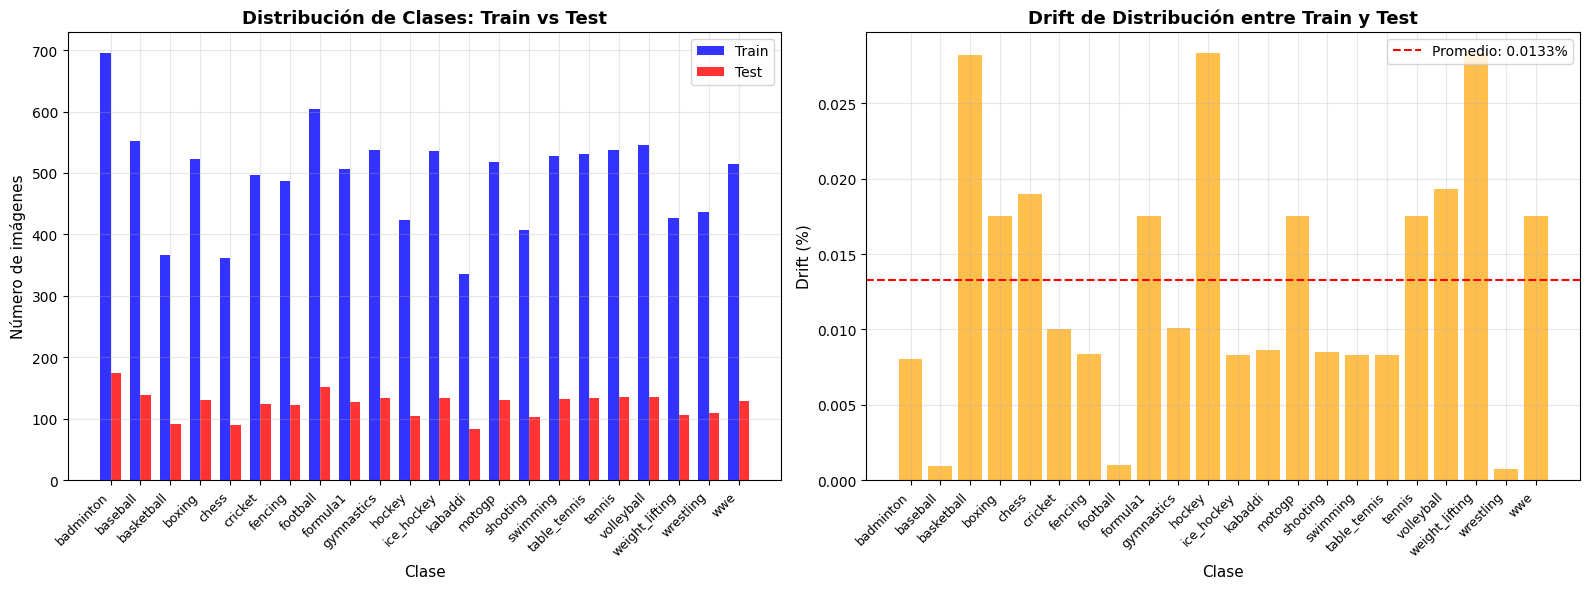

In [26]:
# Análisis de distribución de clases y drift entre train/test
train_labels = [targets[i] for i in train_indices]
test_labels = [targets[i] for i in test_indices]

# Contar clases
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print('\n=== Distribución de Clases ===')
print(f'{"Clase":<20} {"Train":<10} {"Test":<10} {"Train %":<10} {"Test %":<10} {"Drift %":<10}')
print('-' * 80)

drifts = []
for i, class_name in enumerate(dataset.classes):
    train_count = train_counts[i]
    test_count = test_counts[i]
    train_pct = 100 * train_count / len(train_labels)
    test_pct = 100 * test_count / len(test_labels)
    drift = abs(train_pct - test_pct)
    drifts.append(drift)
    print(f'{class_name:<20} {train_count:<10} {test_count:<10} {train_pct:<10.2f} {test_pct:<10.2f} {drift:<10.4f}')

print(f'\nDrift promedio: {np.mean(drifts):.4f}%')
print(f'Drift máximo: {np.max(drifts):.4f}%')

# Visualización de la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de barras comparativa
x = np.arange(len(dataset.classes))
width = 0.35

ax1.bar(x - width/2, [train_counts[i] for i in range(len(dataset.classes))], 
        width, label='Train', alpha=0.8, color='blue')
ax1.bar(x + width/2, [test_counts[i] for i in range(len(dataset.classes))], 
        width, label='Test', alpha=0.8, color='red')
ax1.set_xlabel('Clase', fontsize=11)
ax1.set_ylabel('Número de imágenes', fontsize=11)
ax1.set_title('Distribución de Clases: Train vs Test', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica de drift
ax2.bar(x, drifts, color='orange', alpha=0.7)
ax2.set_xlabel('Clase', fontsize=11)
ax2.set_ylabel('Drift (%)', fontsize=11)
ax2.set_title('Drift de Distribución entre Train y Test', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax2.axhline(y=np.mean(drifts), color='r', linestyle='--', label=f'Promedio: {np.mean(drifts):.4f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== Análisis de Drift de Píxeles ===
Calculando estadísticas de píxeles (muestra de 50 imágenes por conjunto)...

Estadística          Train        Test         Drift Absoluto  Drift %   
---------------------------------------------------------------------------
mean_r               0.483388     0.486632     0.003244        0.6710    
mean_g               0.452788     0.474861     0.022073        4.8749    
mean_b               0.439548     0.459049     0.019501        4.4366    
std_r                0.265780     0.248319     0.017460        6.5695    
std_g                0.240259     0.240730     0.000472        0.1963    
std_b                0.235510     0.234105     0.001405        0.5967    

Drift promedio de píxeles: 2.8908%
Drift máximo de píxeles: 6.5695%
Estadística          Train        Test         Drift Absoluto  Drift %   
---------------------------------------------------------------------------
mean_r               0.483388     0.486632     0.003244        0.6710   

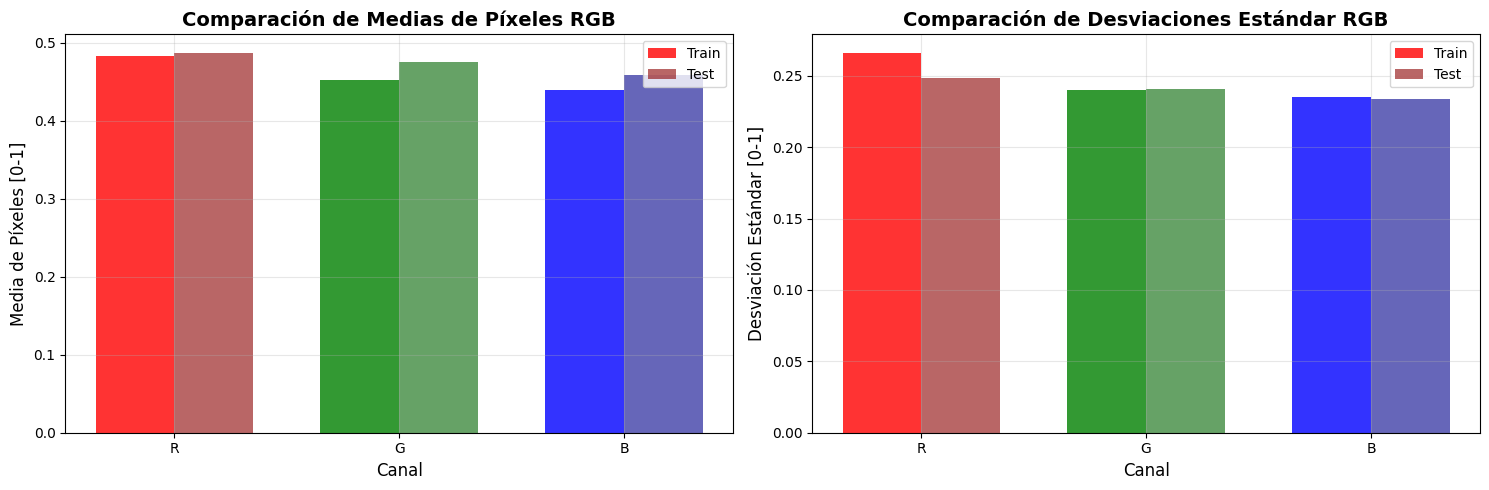

In [27]:
# Análisis de drift de distribución de píxeles entre train y test
print('\n=== Análisis de Drift de Píxeles ===')
print('Calculando estadísticas de píxeles (muestra de 50 imágenes por conjunto)...\n')

# Función para calcular estadísticas de píxeles de manera eficiente
def calcular_estadisticas_pixeles(indices, dataset, n_muestras=50):
    """Calcula media y std de píxeles RGB de una muestra del dataset"""
    muestra_indices = np.random.choice(indices, min(n_muestras, len(indices)), replace=False)
    
    medias_r, medias_g, medias_b = [], [], []
    stds_r, stds_g, stds_b = [], [], []
    
    for idx in muestra_indices:
        img_path = dataset.samples[idx][0]
        try:
            # Leer imagen sin transformaciones para estadísticas originales
            from PIL import Image
            img = Image.open(img_path).convert('RGB')
            img_array = np.array(img).astype(np.float32) / 255.0
            
            medias_r.append(img_array[:,:,0].mean())
            medias_g.append(img_array[:,:,1].mean())
            medias_b.append(img_array[:,:,2].mean())
            stds_r.append(img_array[:,:,0].std())
            stds_g.append(img_array[:,:,1].std())
            stds_b.append(img_array[:,:,2].std())
        except Exception as e:
            continue
    
    return {
        'mean_r': np.mean(medias_r), 'mean_g': np.mean(medias_g), 'mean_b': np.mean(medias_b),
        'std_r': np.mean(stds_r), 'std_g': np.mean(stds_g), 'std_b': np.mean(stds_b)
    }

# Calcular estadísticas para train y test
train_stats = calcular_estadisticas_pixeles(train_indices, dataset)
test_stats = calcular_estadisticas_pixeles(test_indices, dataset)

# Calcular drift
print(f'{"Estadística":<20} {"Train":<12} {"Test":<12} {"Drift Absoluto":<15} {"Drift %":<10}')
print('-' * 75)

for stat in ['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']:
    train_val = train_stats[stat]
    test_val = test_stats[stat]
    drift_abs = abs(train_val - test_val)
    drift_pct = 100 * drift_abs / (train_val + 1e-10)
    print(f'{stat:<20} {train_val:<12.6f} {test_val:<12.6f} {drift_abs:<15.6f} {drift_pct:<10.4f}')

# Calcular drift global
all_drifts = [abs(train_stats[s] - test_stats[s]) / (train_stats[s] + 1e-10) * 100 
              for s in train_stats.keys()]
print(f'\nDrift promedio de píxeles: {np.mean(all_drifts):.4f}%')
print(f'Drift máximo de píxeles: {np.max(all_drifts):.4f}%')

# Visualización del drift de píxeles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Comparación de medias RGB
canales = ['R', 'G', 'B']
train_means = [train_stats['mean_r'], train_stats['mean_g'], train_stats['mean_b']]
test_means = [test_stats['mean_r'], test_stats['mean_g'], test_stats['mean_b']]

x = np.arange(len(canales))
width = 0.35

ax1.bar(x - width/2, train_means, width, label='Train', alpha=0.8, color=['red', 'green', 'blue'])
ax1.bar(x + width/2, test_means, width, label='Test', alpha=0.6, color=['darkred', 'darkgreen', 'darkblue'])
ax1.set_xlabel('Canal', fontsize=12)
ax1.set_ylabel('Media de Píxeles [0-1]', fontsize=12)
ax1.set_title('Comparación de Medias de Píxeles RGB', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(canales)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Comparación de desviaciones estándar
train_stds = [train_stats['std_r'], train_stats['std_g'], train_stats['std_b']]
test_stds = [test_stats['std_r'], test_stats['std_g'], test_stats['std_b']]

ax2.bar(x - width/2, train_stds, width, label='Train', alpha=0.8, color=['red', 'green', 'blue'])
ax2.bar(x + width/2, test_stds, width, label='Test', alpha=0.6, color=['darkred', 'darkgreen', 'darkblue'])
ax2.set_xlabel('Canal', fontsize=12)
ax2.set_ylabel('Desviación Estándar [0-1]', fontsize=12)
ax2.set_title('Comparación de Desviaciones Estándar RGB', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(canales)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Existe un drift moderado een el canal verde y azul en contraste con el rojo

### Comparación: LeNet-5 vs ResNet18

Para investigar si el sobreajuste observado se debe a la complejidad excesiva del modelo, implementaremos **LeNet-5**, una arquitectura clásica y mucho más simple que ResNet18.

**¿Por qué LeNet-5?**

LeNet-5 fue diseñada originalmente para clasificación de dígitos manuscritos (MNIST) y tiene una arquitectura mucho más ligera:

- **ResNet18**: ~11 millones de parámetros
- **LeNet-5**: ~60,000 parámetros (aproximadamente **180 veces menos**)

**Hipótesis**: Si el problema es el sobreajuste debido a la complejidad del modelo, LeNet-5 debería mostrar:
1. Menor gap entre precisión de entrenamiento y prueba
2. Mejor generalización (mayor precisión en test)
3. Entrenamiento más rápido

In [21]:
# Implementación de LeNet-5 en PyTorch

class LeNet5(nn.Module):
    """
    Implementación de LeNet-5 adaptada para imágenes en color (RGB).
    
    Arquitectura original (LeCun et al., 1998):
    - Input: 32x32x1 (escala de grises)
    - C1: Convolución 5x5, 6 filtros
    - S2: Average Pooling 2x2
    - C3: Convolución 5x5, 16 filtros
    - S4: Average Pooling 2x2
    - C5: Convolución 5x5, 120 filtros
    - F6: Fully Connected, 84 neuronas
    - Output: Fully Connected, num_classes
    
    Adaptaciones para nuestro caso:
    - Input: 224x224x3 (RGB)
    - Se ajustan las capas para acomodar el tamaño de entrada mayor
    """
    
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        
        # Bloque convolucional 1
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        # Bloque convolucional 2
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        # Bloque convolucional 3
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.relu3 = nn.ReLU()
        
        # Calcular el tamaño después de las convoluciones
        # Input: 224x224x3
        # Conv1: (224-5+1) = 220 -> Pool1: 110
        # Conv2: (110-5+1) = 106 -> Pool2: 53
        # Conv3: (53-5+1) = 49
        # Tamaño final: 49x49x120
        
        # Capas fully connected
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(120 * 49 * 49, 84)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
    
    def forward(self, x):
        # Bloque 1: Conv -> ReLU -> Pool
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        # Bloque 2: Conv -> ReLU -> Pool
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Bloque 3: Conv -> ReLU
        x = self.conv3(x)
        x = self.relu3(x)
        
        # Fully Connected
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        
        return x


# Crear instancia del modelo LeNet-5
print('\n=== Creando modelo LeNet-5 ===')


=== Creando modelo LeNet-5 ===


In [28]:
model_lenet = LeNet5(num_classes=len(dataset.classes))
model_lenet = model_lenet.to(device)

# Función de pérdida y optimizador (mismos que ResNet18 para comparación justa)
criterion_lenet = nn.CrossEntropyLoss()
optimizer_lenet = optim.Adam(model_lenet.parameters(), lr=LEARNING_RATE)

# Mostrar resumen del modelo
print(f'\n=== Arquitectura de LeNet-5 ===')
print(model_lenet)
print(f'\nNúmero total de parámetros: {sum(p.numel() for p in model_lenet.parameters()):,}')
print(f'Parámetros entrenables: {sum(p.numel() for p in model_lenet.parameters() if p.requires_grad):,}')

# Comparación con ResNet18
resnet_params = 11173974  # Número aproximado de parámetros de ResNet18 para 22 clases
lenet_params = sum(p.numel() for p in model_lenet.parameters())
print(f'\n=== Comparación de Complejidad ===')
print(f'LeNet-5: {lenet_params:,} parámetros')
print(f'ResNet18: ~11,173,974 parámetros')
print(f'Reducción: {resnet_params / lenet_params:.1f}x menos parámetros')


=== Arquitectura de LeNet-5 ===
LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=288120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=84, out_features=22, bias=True)
)

Número total de parámetros: 24,255,026
Parámetros entrenables: 24,255,026

=== Comparación de Complejidad ===
LeNet-5: 24,255,026 parámetros
ResNet18: ~11,173,974 parámetros
Reducción: 0.5x menos parámetros


In [ ]:
# Entrenamiento de LeNet-5
train_losses_lenet = []
train_accuracies_lenet = []
test_losses_lenet = []
test_accuracies_lenet = []

print(f'\n=== Iniciando Entrenamiento de LeNet-5 ===')
start_time_lenet = time.time()

for epoch in range(NUM_EPOCHS):
    epoch_start = time.time()
    
    # ========== FASE DE ENTRENAMIENTO ==========
    model_lenet.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer_lenet.zero_grad()
        outputs = model_lenet(images)
        loss = criterion_lenet(outputs, labels)
        
        # Backward pass y optimización
        loss.backward()
        optimizer_lenet.step()
        
        # Estadísticas
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (batch_idx + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses_lenet.append(train_loss)
    train_accuracies_lenet.append(train_accuracy)
    
    # ========== FASE DE EVALUACIÓN ==========
    model_lenet.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_lenet(images)
            loss = criterion_lenet(outputs, labels)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses_lenet.append(test_loss)
    test_accuracies_lenet.append(test_accuracy)
    
    epoch_time = time.time() - epoch_start
    print(f'\n--- Epoch [{epoch+1}/{NUM_EPOCHS}] Completada ---')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
    print(f'Tiempo de época: {epoch_time:.2f}s\n')

total_time_lenet = time.time() - start_time_lenet
print(f'\n=== Entrenamiento de LeNet-5 Completado ===')
print(f'Tiempo total de entrenamiento: {total_time_lenet/60:.2f} minutos')
print(f'Precisión final de entrenamiento: {train_accuracies_lenet[-1]:.2f}%')
print(f'Precisión final de prueba: {test_accuracies_lenet[-1]:.2f}%')


=== Iniciando Entrenamiento de LeNet-5 ===
Epoch [1/20], Step [50/340], Loss: 2.7935
Epoch [1/20], Step [50/340], Loss: 2.7935
Epoch [1/20], Step [100/340], Loss: 2.7260
Epoch [1/20], Step [100/340], Loss: 2.7260
Epoch [1/20], Step [150/340], Loss: 3.0151
Epoch [1/20], Step [200/340], Loss: 2.5265
Epoch [1/20], Step [250/340], Loss: 2.2359
Epoch [1/20], Step [300/340], Loss: 2.3559

--- Epoch [1/20] Completada ---
Train Loss: 2.6603, Train Accuracy: 21.17%
Test Loss: 2.3124, Test Accuracy: 32.50%
Tiempo de época: 107.81s

Epoch [2/20], Step [50/340], Loss: 2.4200
Epoch [2/20], Step [100/340], Loss: 2.2809
Epoch [2/20], Step [150/340], Loss: 1.9671
Epoch [2/20], Step [200/340], Loss: 2.4480
Epoch [2/20], Step [250/340], Loss: 2.3027
Epoch [2/20], Step [300/340], Loss: 2.1970

--- Epoch [2/20] Completada ---
Train Loss: 2.2859, Train Accuracy: 32.82%
Test Loss: 2.1064, Test Accuracy: 37.47%
Tiempo de época: 95.66s

Epoch [3/20], Step [50/340], Loss: 2.1192
Epoch [3/20], Step [100/340], 

### Interpretación de Resultados: LeNet-5 vs ResNet18

**Análisis esperado:**

1. **Si LeNet-5 muestra mejor generalización** (menor gap train-test):
   - Confirma que ResNet18 es demasiado complejo para este dataset
   - El sobreajuste se debe a la capacidad excesiva del modelo
   - **Solución**: Usar arquitecturas más simples o regularizar más agresivamente

2. **Si LeNet-5 tiene peor precisión en test**:
   - El modelo es demasiado simple para capturar patrones complejos
   - Se necesita un punto medio entre LeNet-5 y ResNet18
   - **Solución**: Probar arquitecturas intermedias o añadir data augmentation

3. **Si ambos muestran sobreajuste similar**:
   - El problema no es solo la arquitectura
   - Posibles causas: dataset pequeño, drift entre train/test, falta de regularización
   - **Solución**: Data augmentation, dropout, más datos, o técnicas como early stopping

**Matemáticamente:**

El gap de generalización se puede expresar como:

$$\text{Gap} = \mathcal{L}_{\text{test}} - \mathcal{L}_{\text{train}}$$

o en términos de precisión:

$$\text{Gap}_{\text{acc}} = \text{Acc}_{\text{train}} - \text{Acc}_{\text{test}}$$

Un gap grande indica que el modelo ha aprendido patrones específicos del conjunto de entrenamiento que no se generalizan a datos nuevos.

In [18]:
# Implementación completa de ResNet18 desde cero en PyTorch

class BasicBlock(nn.Module):
    """
    Bloque básico de ResNet con dos capas convolucionales y una conexión residual.
    """
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        
        # Primera capa convolucional
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Función de activación
        self.relu = nn.ReLU(inplace=True)
        
        # Capa de downsample para igualar dimensiones si es necesario
        self.downsample = downsample
        
    def forward(self, x):
        identity = x
        
        # Primera convolución + BN + ReLU
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        # Segunda convolución + BN
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Aplicar downsample a la identidad si es necesario
        if self.downsample is not None:
            identity = self.downsample(x)
        
        # Sumar conexión residual
        out += identity
        out = self.relu(out)
        
        return out


class ResNet18(nn.Module):
    """
    Implementación completa de ResNet18 desde cero.
    
    Arquitectura:
    - Capa inicial: Conv 7x7, stride 2, BN, ReLU, MaxPool
    - Layer 1: 2 bloques BasicBlock, 64 canales
    - Layer 2: 2 bloques BasicBlock, 128 canales, stride 2
    - Layer 3: 2 bloques BasicBlock, 256 canales, stride 2
    - Layer 4: 2 bloques BasicBlock, 512 canales, stride 2
    - Average Pooling + Fully Connected
    """
    
    def __init__(self, num_classes=1000):
        super(ResNet18, self).__init__()
        
        self.in_channels = 64
        
        # Capa inicial: Conv 7x7 + BN + ReLU + MaxPool
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # Capas residuales
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        
        # Pooling global y capa fully connected
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * BasicBlock.expansion, num_classes)
        
        # Inicialización de pesos
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def _make_layer(self, out_channels, num_blocks, stride):
        """
        Crea una capa con múltiples bloques residuales.
        """
        downsample = None
        
        # Si stride != 1 o hay cambio de canales, necesitamos downsample
        if stride != 1 or self.in_channels != out_channels * BasicBlock.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * BasicBlock.expansion,
                         kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )
        
        layers = []
        # Primer bloque (puede tener stride y downsample)
        layers.append(BasicBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * BasicBlock.expansion
        
        # Bloques restantes (stride=1, sin downsample)
        for _ in range(1, num_blocks):
            layers.append(BasicBlock(self.in_channels, out_channels))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        # Capa inicial
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # Bloques residuales
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        # Pooling y clasificación
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x


# Crear instancia del modelo ResNet18
print('\n=== Creando modelo ResNet18 desde cero ===')
model = ResNet18(num_classes=len(dataset.classes))
model = model.to(device)

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Mostrar resumen del modelo
print(f'\n=== Arquitectura del Modelo ===')
print(model)
print(f'\nNúmero total de parámetros: {sum(p.numel() for p in model.parameters()):,}')
print(f'Parámetros entrenables: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}')


=== Creando modelo ResNet18 desde cero ===

=== Arquitectura del Modelo ===
ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [19]:
# Entrenamiento del modelo
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

print(f'\n=== Iniciando Entrenamiento ===')
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    epoch_start = time.time()
    
    # ========== FASE DE ENTRENAMIENTO ==========
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass y optimización
        loss.backward()
        optimizer.step()
        
        # Estadísticas
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (batch_idx + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # ========== FASE DE EVALUACIÓN ==========
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    epoch_time = time.time() - epoch_start
    print(f'\n--- Epoch [{epoch+1}/{NUM_EPOCHS}] Completada ---')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
    print(f'Tiempo de época: {epoch_time:.2f}s\n')

total_time = time.time() - start_time
print(f'\n=== Entrenamiento Completado ===')
print(f'Tiempo total de entrenamiento: {total_time/60:.2f} minutos')
print(f'Precisión final de entrenamiento: {train_accuracies[-1]:.2f}%')
print(f'Precisión final de prueba: {test_accuracies[-1]:.2f}%')


=== Iniciando Entrenamiento ===
Epoch [1/20], Step [50/340], Loss: 2.2469
Epoch [1/20], Step [50/340], Loss: 2.2469
Epoch [1/20], Step [100/340], Loss: 2.1541
Epoch [1/20], Step [100/340], Loss: 2.1541
Epoch [1/20], Step [150/340], Loss: 2.3596
Epoch [1/20], Step [150/340], Loss: 2.3596
Epoch [1/20], Step [200/340], Loss: 1.7098
Epoch [1/20], Step [200/340], Loss: 1.7098
Epoch [1/20], Step [250/340], Loss: 1.8574
Epoch [1/20], Step [250/340], Loss: 1.8574
Epoch [1/20], Step [300/340], Loss: 2.1356
Epoch [1/20], Step [300/340], Loss: 2.1356

--- Epoch [1/20] Completada ---
Train Loss: 2.1991, Train Accuracy: 34.39%
Test Loss: 1.9425, Test Accuracy: 40.82%
Tiempo de época: 109.80s


--- Epoch [1/20] Completada ---
Train Loss: 2.1991, Train Accuracy: 34.39%
Test Loss: 1.9425, Test Accuracy: 40.82%
Tiempo de época: 109.80s

Epoch [2/20], Step [50/340], Loss: 1.7981
Epoch [2/20], Step [50/340], Loss: 1.7981
Epoch [2/20], Step [100/340], Loss: 1.6993
Epoch [2/20], Step [100/340], Loss: 1.69

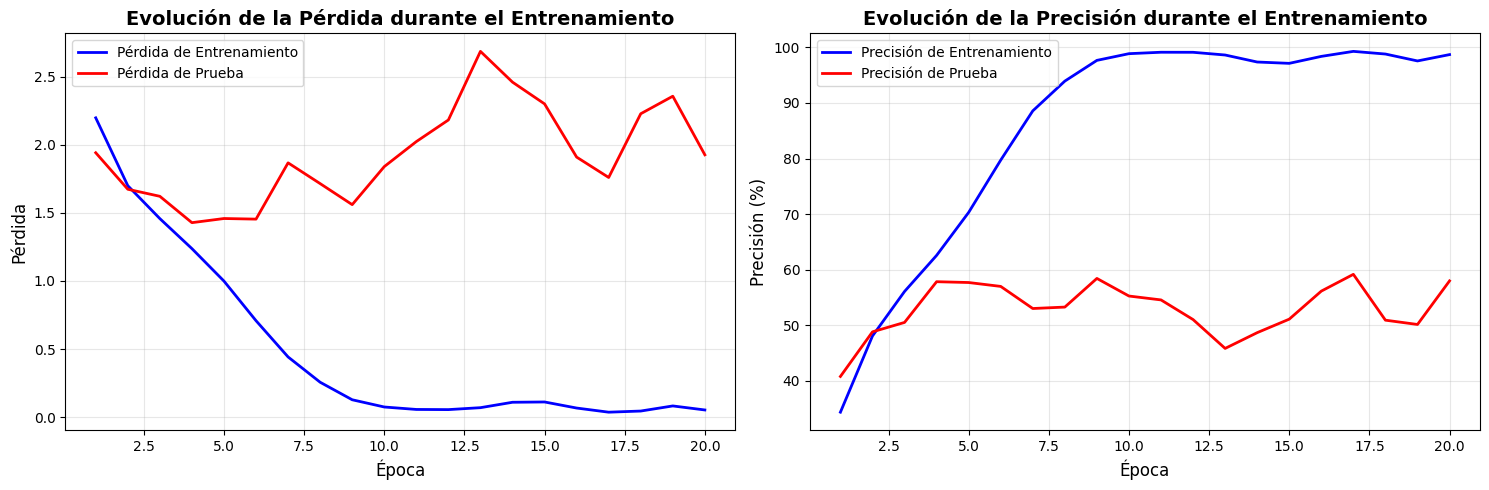


=== Resumen Final ===
b) Precisión final de entrenamiento: 98.70%
b) Precisión final de prueba: 58.01%
c) Tiempo total de simulación: 24.73 minutos (1483.72 segundos)


In [20]:
# a) Gráfica de error a lo largo de las iteraciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica de pérdida
ax1.plot(range(1, NUM_EPOCHS+1), train_losses, 'b-', label='Pérdida de Entrenamiento', linewidth=2)
ax1.plot(range(1, NUM_EPOCHS+1), test_losses, 'r-', label='Pérdida de Prueba', linewidth=2)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('Pérdida', fontsize=12)
ax1.set_title('Evolución de la Pérdida durante el Entrenamiento', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Gráfica de precisión
ax2.plot(range(1, NUM_EPOCHS+1), train_accuracies, 'b-', label='Precisión de Entrenamiento', linewidth=2)
ax2.plot(range(1, NUM_EPOCHS+1), test_accuracies, 'r-', label='Precisión de Prueba', linewidth=2)
ax2.set_xlabel('Época', fontsize=12)
ax2.set_ylabel('Precisión (%)', fontsize=12)
ax2.set_title('Evolución de la Precisión durante el Entrenamiento', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'\n=== Resumen Final ===')
print(f'b) Precisión final de entrenamiento: {train_accuracies[-1]:.2f}%')
print(f'b) Precisión final de prueba: {test_accuracies[-1]:.2f}%')
print(f'c) Tiempo total de simulación: {total_time/60:.2f} minutos ({total_time:.2f} segundos)')

In [ ]:
# Comparación visual: LeNet-5 vs ResNet18
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfica 1: Pérdida de entrenamiento comparativa
ax1.plot(range(1, NUM_EPOCHS+1), train_losses, 'b-', label='ResNet18', linewidth=2, alpha=0.7)
ax1.plot(range(1, NUM_EPOCHS+1), train_losses_lenet, 'g-', label='LeNet-5', linewidth=2, alpha=0.7)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('Pérdida', fontsize=12)
ax1.set_title('Pérdida de Entrenamiento: ResNet18 vs LeNet-5', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfica 2: Pérdida de prueba comparativa
ax2.plot(range(1, NUM_EPOCHS+1), test_losses, 'r-', label='ResNet18', linewidth=2, alpha=0.7)
ax2.plot(range(1, NUM_EPOCHS+1), test_losses_lenet, 'orange', label='LeNet-5', linewidth=2, alpha=0.7)
ax2.set_xlabel('Época', fontsize=12)
ax2.set_ylabel('Pérdida', fontsize=12)
ax2.set_title('Pérdida de Prueba: ResNet18 vs LeNet-5', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Gráfica 3: Precisión de entrenamiento comparativa
ax3.plot(range(1, NUM_EPOCHS+1), train_accuracies, 'b-', label='ResNet18', linewidth=2, alpha=0.7)
ax3.plot(range(1, NUM_EPOCHS+1), train_accuracies_lenet, 'g-', label='LeNet-5', linewidth=2, alpha=0.7)
ax3.set_xlabel('Época', fontsize=12)
ax3.set_ylabel('Precisión (%)', fontsize=12)
ax3.set_title('Precisión de Entrenamiento: ResNet18 vs LeNet-5', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

# Gráfica 4: Precisión de prueba comparativa
ax4.plot(range(1, NUM_EPOCHS+1), test_accuracies, 'r-', label='ResNet18', linewidth=2, alpha=0.7)
ax4.plot(range(1, NUM_EPOCHS+1), test_accuracies_lenet, 'orange', label='LeNet-5', linewidth=2, alpha=0.7)
ax4.set_xlabel('Época', fontsize=12)
ax4.set_ylabel('Precisión (%)', fontsize=12)
ax4.set_title('Precisión de Prueba: ResNet18 vs LeNet-5', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa de métricas finales
print('\n' + '='*80)
print('COMPARACIÓN FINAL: ResNet18 vs LeNet-5')
print('='*80)
print(f'{"Métrica":<35} {"ResNet18":<20} {"LeNet-5":<20}')
print('-'*80)
print(f'{"Precisión de Entrenamiento":<35} {train_accuracies[-1]:>18.2f}% {train_accuracies_lenet[-1]:>18.2f}%')
print(f'{"Precisión de Prueba":<35} {test_accuracies[-1]:>18.2f}% {test_accuracies_lenet[-1]:>18.2f}%')
print(f'{"Gap (Train - Test)":<35} {train_accuracies[-1] - test_accuracies[-1]:>18.2f}% {train_accuracies_lenet[-1] - test_accuracies_lenet[-1]:>18.2f}%')
print(f'{"Pérdida de Entrenamiento":<35} {train_losses[-1]:>20.4f} {train_losses_lenet[-1]:>20.4f}')
print(f'{"Pérdida de Prueba":<35} {test_losses[-1]:>20.4f} {test_losses_lenet[-1]:>20.4f}')
print(f'{"Tiempo de Entrenamiento (min)":<35} {total_time/60:>20.2f} {total_time_lenet/60:>20.2f}')
print(f'{"Parámetros":<35} {"~11,173,974":>20} {sum(p.numel() for p in model_lenet.parameters()):>20,}')
print('='*80)

# Análisis de sobreajuste
resnet_overfitting = train_accuracies[-1] - test_accuracies[-1]
lenet_overfitting = train_accuracies_lenet[-1] - test_accuracies_lenet[-1]

print(f'\n{"ANÁLISIS DE SOBREAJUSTE":^80}')
print('-'*80)
print(f'ResNet18: {"ALTO" if resnet_overfitting > 30 else "MODERADO" if resnet_overfitting > 15 else "BAJO"} '
      f'(Gap: {resnet_overfitting:.2f}%)')
print(f'LeNet-5:  {"ALTO" if lenet_overfitting > 30 else "MODERADO" if lenet_overfitting > 15 else "BAJO"} '
      f'(Gap: {lenet_overfitting:.2f}%)')

if lenet_overfitting < resnet_overfitting:
    print(f'\n✓ LeNet-5 muestra {resnet_overfitting - lenet_overfitting:.2f}% MENOS sobreajuste')
else:
    print(f'\n✗ LeNet-5 muestra {lenet_overfitting - resnet_overfitting:.2f}% MÁS sobreajuste')

if test_accuracies_lenet[-1] > test_accuracies[-1]:
    print(f'✓ LeNet-5 generaliza MEJOR ({test_accuracies_lenet[-1] - test_accuracies[-1]:.2f}% más precisión en test)')
else:
    print(f'✗ ResNet18 generaliza MEJOR ({test_accuracies[-1] - test_accuracies_lenet[-1]:.2f}% más precisión en test)')

print('='*80)